In [2]:
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
import seaborn as sns

In [3]:
# Load the dataset
data= pd.read_csv('Review_data.csv')

In [3]:
print(data.shape)   ## Dataset shape

data.sample(12) 

(39360, 2)


,review,rating
4546,[''],5-star
20486,[''],1-star
31536,Voice quality is good. But carry option is not...,4-star
9790,"[""Please I request don't by this product phone...",1-star
31109,"Poor bass,Bass is to poor",3-star
18627,['यह घड़ी बहुत सुंदर है और इसके फीचर्स बहुत अच...,5-star
22427,"[""Watch hangs at least twice in a day. It woul...",3-star
32526,Worth buying but little hassel to use it every...,3-star
20337,[''],1-star
28138,good.black ink not working properly,3-star


In [4]:
#
import nltk
from nltk.corpus import stopwords
import string
stop_word= stopwords.words('english')
punct = string.punctuation
import re
from nltk.stem import WordNetLemmatizer
lemmatize= WordNetLemmatizer()


In [5]:
stop_word= set(stopwords.words('english'))
stop_word.update(('u','n','r', 'un','il','th','da', 'p','c','a','k','s','x'))
stop_word.remove('not')


# CLEANING THE DATASET

In [6]:
#

def clean_data(comment):
    text= re.sub(r'\n+',' ', comment)
    text= re.sub(r'http\S+', '', text)
    text= re.sub(r'\$+', ' dollar ', text)
    text=re.sub(r'\d{10,}', ' number ',text )
    text= re.sub(r'https?:\/{2}.*?[\s+]', ' ', text ) # remove hyperlink
    text= re.sub(r"can\'t",'can not',text)
    text= re.sub(r"n\'t", ' not', text)
    text= re.sub(r"'", " ' ", text)
    text= re.sub(r'"', ' " ', text)  
    text= re.sub(r"\'ve", ' have', text)
    text= re.sub(r"\'m", ' am', text)
    text= re.sub(r"\'re", ' are', text)
    text= re.sub("\'s", 's', text)
    text= re.sub("\s+",' ', text)
    text= text.lower()
    text= re.sub('[^A-Za-z0-9]+',' ', text)
    text= re.sub("\s+",' ', text)

    return text

In [7]:
# #
clean_text = []
for n in range(len(data['review'][0:])):
    wd= clean_data(data['review'][n])
    clean_text.append(wd)

data['comment']= clean_text

In [8]:
## making new column for review length  stopwords 
length=[]
for n in range(len(data['comment'][0:])):
    length.append(len(data['comment'][n].split(' ')))
data['review_length']= length

In [9]:

##     Removing stopwords , lemmatization the review text
from tqdm import tqdm
preprocess_text=[]
for var in tqdm(data['comment'].values):
    sent= re.sub('[^A-Za-z]+',' ', var)
    sent= ' '.join(w for w in sent.split() if w not in stop_word) #
    sent= ' '.join(lemmatize.lemmatize(e) for e in sent.split()) #
    preprocess_text.append(sent.lower().strip())

data['review']= preprocess_text

100%|██████████████████████████████████████████████████████████████████████████| 39360/39360 [00:07<00:00, 5282.88it/s]


In [10]:


## let's check duplicate rows in dataset
print('original shape',data.shape)
print('Duplicates rows',data.duplicated(subset=['review',]).sum())  

data.drop_duplicates(subset= ['review'] ,inplace=True,ignore_index=True)   # removed duplicate rows
print('dataset shape without duplicate rows',data.shape)

original shape (39360, 4)
Duplicates rows 12998
dataset shape without duplicate rows (26362, 4)


In [11]:

#
# making new column for cleaned review length 
length=[]
for n in range(len(data['review'][0:])):
    length.append(len(data['review'][n].split()))
data['clean_review_length']= length

In [12]:
# let's check differences between review_length and clean_review_length 
data[['review','review_length','clean_review_length']].sample(6)



,review,review_length,clean_review_length
12664,hard user battery drain day strap could better...,44,21
1279,good tv picture clarity ultimate sound enough ...,24,14
3134,not work team zoom meeting tool total waste mo...,29,17
3963,know others loved phone really faster processo...,60,33
23429,average poor wifi coverage experienced,7,5
20560,lovely go sound level high bass good connect p...,27,17


In [13]:
data.drop(25, inplace=True)
data.reset_index(drop=True,inplace=True)

In [14]:

# counting the values of rating variable
data['rating'].value_counts()

1-star       6235
5-star       5475
4-star       4632
3-star       4181
2-star       3756
5            1270
4             354
four-star     174
1             173
3              82
2              29
Name: rating, dtype: int64

In [15]:
# replacing the value in rating variaable
data['rating'].replace({'1-star':1,'2-star':2,'3-star':3,'4-star':4,'5-star':5,'four-star':4,
                        '5':5,'4':4,'3':3,'2':2,'1':1},inplace=True)

In [16]:
#  Target variable is imbalanced 
data['rating'].value_counts()

5    6745
1    6408
4    5160
3    4263
2    3785
Name: rating, dtype: int64

In [17]:
# COUNTING THE TOTAL NUMBERS OF WORDS 

print('total word length of review =',data['review_length'].sum())
print('clean review word length =',data['clean_review_length'].sum())

total word length of review = 901495
clean review word length = 492534


In [28]:
#  Statistical description about review length
data[['review_length','clean_review_length']].describe()

# About 1 to 2 percent of review are over 100 words 

,review_length,clean_review_length
count,26361.000000,26361.000000
mean,34.198058,18.684193
std,46.886276,24.551054
min,2.000000,1.000000
25%,10.000000,6.000000
50%,20.000000,12.000000
75%,42.000000,23.000000
max,1560.000000,815.000000


In [35]:
#
data[data['clean_review_length']>=100].shape

(337, 5)

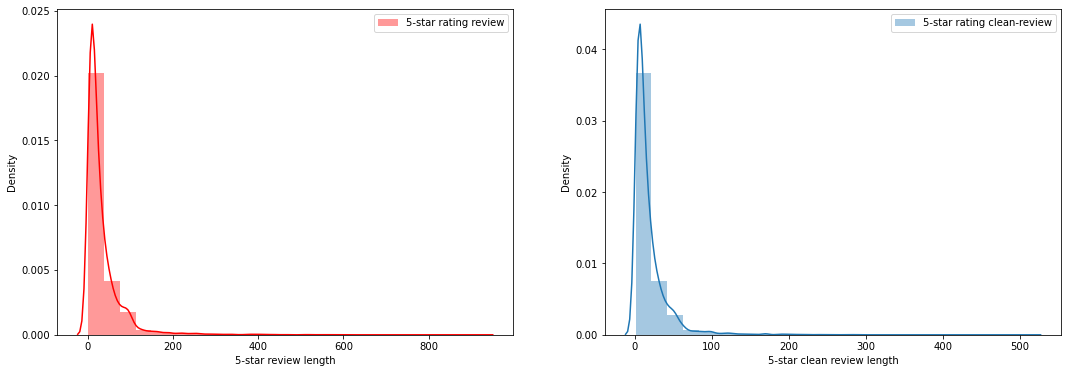

In [18]:
## Checking the distribution of reviews of the five-star rating  
f,ax= plt.subplots(1,2,figsize=(18,6))

sns.distplot(data[data['rating']==5]['review_length'], bins=25, ax=ax[0], label='5-star rating review',color='r')
ax[0].set_xlabel('5-star review length')
ax[0].legend()

sns.distplot(data[data['rating']==5]['clean_review_length'], bins=25, ax=ax[1], label='5-star rating clean-review')
ax[1].set_xlabel('5-star clean review length')
ax[1].legend()
plt.show()

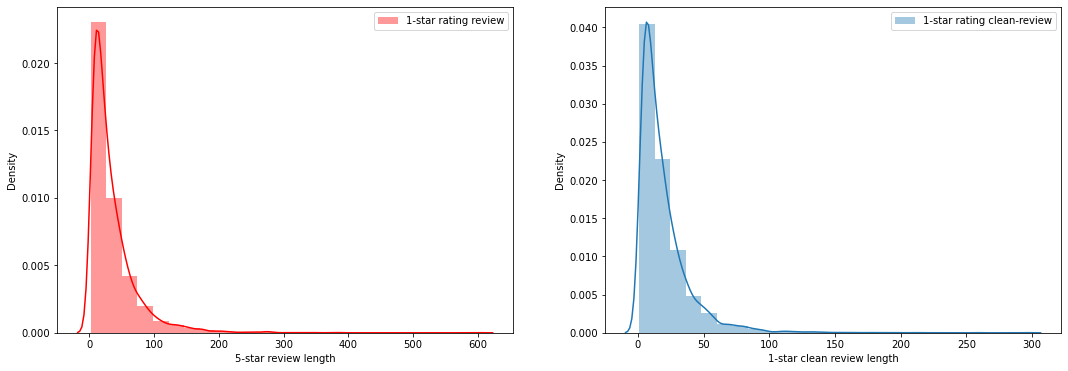

In [19]:
## DISTRIBUTION OF 1-star REVIEWS LENGTH
f,ax= plt.subplots(1,2,figsize=(18,6))

sns.distplot(data[data['rating']==1]['review_length'], bins=25, ax=ax[0], label='1-star rating review',color='r')
ax[0].set_xlabel('5-star review length')
ax[0].legend()

sns.distplot(data[data['rating']==1]['clean_review_length'], bins=25, ax=ax[1], label='1-star rating clean-review')
ax[1].set_xlabel('1-star clean review length')
ax[1].legend()
plt.show()

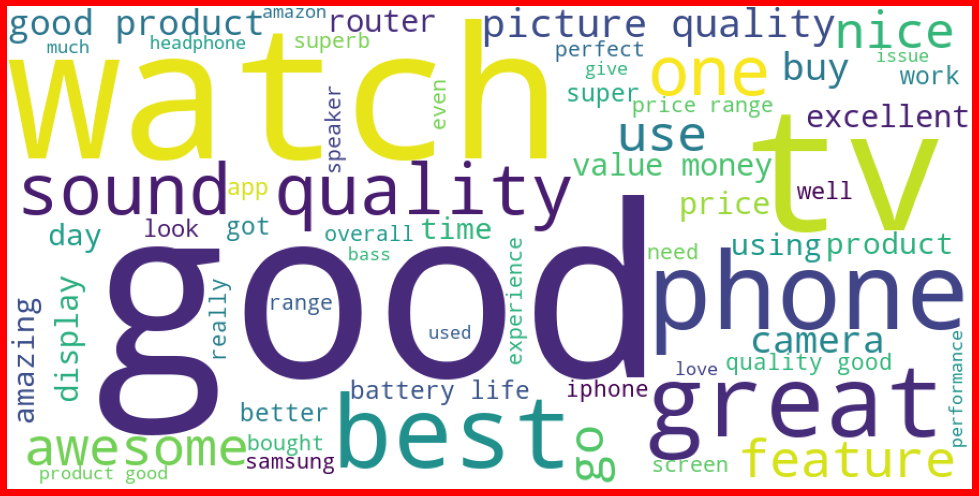

In [25]:

# GETTING SENSE OF CLOUD WORDS OF '5-star rating review'
from wordcloud import WordCloud

star_five= data['review'][data['rating']==5]
rating_cloud= WordCloud(width=900,height=450, background_color='white', max_words=60).generate(' '.join(star_five))

plt.figure(figsize=(14,7), facecolor='r')
plt.imshow(rating_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

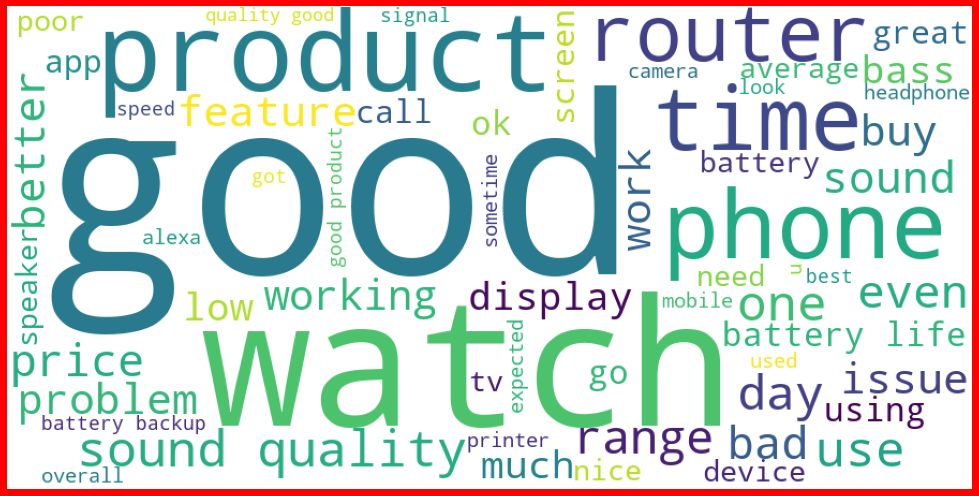

In [45]:

# GETTING SENSE OF CLOUD WORDS OF '3-star rating review'
from wordcloud import WordCloud

three_star= data['review'][data['rating']==3]
rating_cloud= WordCloud(width=900,height=450, background_color='white', max_words=60).generate(' '.join(three_star))

plt.figure(figsize=(14,7), facecolor='r')
plt.imshow(rating_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

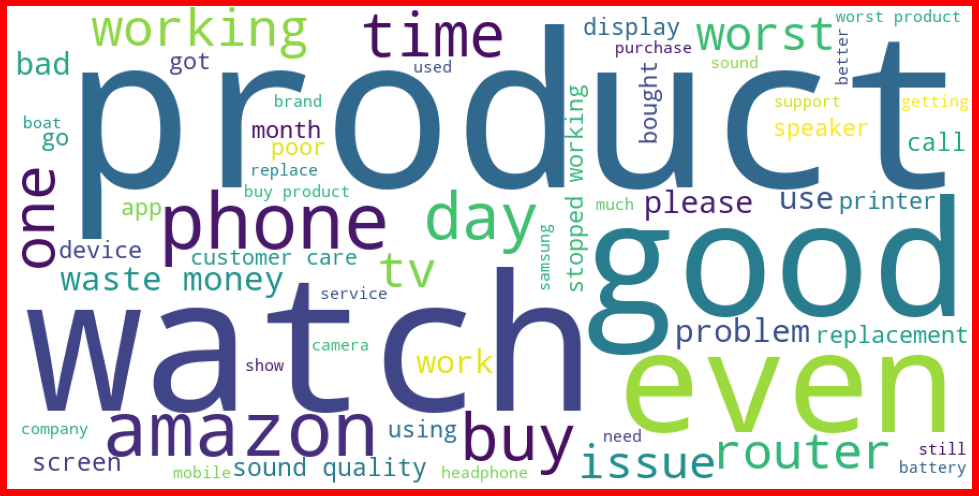

In [26]:

# GETTING SENSE OF CLOUD WORDS OF '1-star rating review'
from wordcloud import WordCloud

_star= data['review'][data['rating']==1]
rating_cloud= WordCloud(width=900,height=450, background_color='white', max_words=60).generate(' '.join(_star))

plt.figure(figsize=(14,7), facecolor='r')
plt.imshow(rating_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# WE CAN SEE DIFFERENCES BETWEEN 5-star reviews and 1-star reviews in above DIAGRAM 


# LET'S BUILD THE MODEL

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import *
from sklearn.naive_bayes import MultinomialNB, BernoulliNB


In [37]:
##  VECTORIZATION THE REVIEWS WITH TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()
X = tfidf.fit_transform(data['review'])
X.shape

(26361, 15791)

In [21]:
## target variable
y= data['rating']

## SPLITTING THE DATA INTO TRAIN & TEST
x_train,x_test, y_train,y_test= train_test_split(data['review'],y, test_size=0.20, random_state=9, stratify=y)

##  VECTORIZATION THE REVIEWS WITH TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf= TfidfVectorizer()
tf_fit = tf.fit(x_train)
x_train= tf_fit.transform(x_train)
x_test= tf_fit.transform(x_test)


accuracy_score 0.5236108477147734
classification_report               precision    recall  f1-score   support

           1       0.55      0.84      0.66      1282
           2       0.47      0.21      0.29       757
           3       0.38      0.21      0.27       853
           4       0.44      0.29      0.35      1032
           5       0.57      0.78      0.66      1349

    accuracy                           0.52      5273
   macro avg       0.48      0.47      0.45      5273
weighted avg       0.50      0.52      0.48      5273



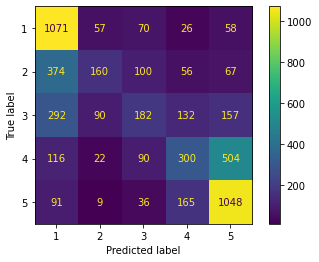

In [22]:
#               RANDOM FOREST CLASSIFIER
rf= RandomForestClassifier(n_jobs=-1,oob_score=True,n_estimators=200)
rf.fit(x_train,y_train)
pred= rf.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print('classification_report',classification_report(y_test,pred))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,pred, labels= rf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

accuracy_score 0.5156457424615968
classification_report 
               precision    recall  f1-score   support

           1       0.54      0.82      0.65      1282
           2       0.42      0.22      0.29       757
           3       0.38      0.21      0.27       853
           4       0.43      0.30      0.35      1032
           5       0.58      0.75      0.65      1349

    accuracy                           0.52      5273
   macro avg       0.47      0.46      0.44      5273
weighted avg       0.49      0.52      0.48      5273



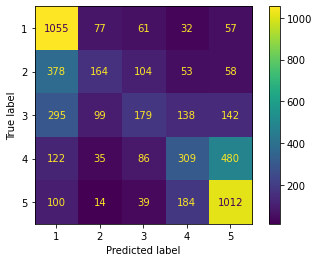

In [23]:

##                             EXTRATREES CLASSIFIER 
et= ExtraTreesClassifier()
et.fit(x_train,y_train)
predict= et.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predict))
print('classification_report \n',classification_report(y_test,predict))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,predict, labels= et.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=et.classes_)
disp.plot()
plt.show()

accuracy_score 0.5091978001137872
classification_report 
               precision    recall  f1-score   support

           1       0.53      0.87      0.66      1282
           2       0.54      0.13      0.21       757
           3       0.38      0.09      0.15       853
           4       0.39      0.26      0.31      1032
           5       0.54      0.84      0.66      1349

    accuracy                           0.51      5273
   macro avg       0.48      0.44      0.40      5273
weighted avg       0.48      0.51      0.44      5273



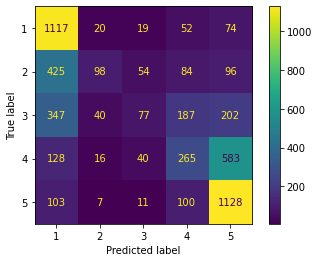

In [24]:
##                             MULTINOMIALNB
mnb= MultinomialNB()
mnb.fit(x_train,y_train)
predict= mnb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predict))
print('classification_report \n',classification_report(y_test,predict))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,predict, labels= mnb.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_)
disp.plot()                 
plt.show() 


# 2 

In [25]:
#  we convert the multiclass values(5,4,3,2,1) into three different types (5,3,1) of target variable 

y1 = data['rating'].replace({4:5,2:1})

x_train,x_test, y_train,y_test= train_test_split(data['review'] , y1, test_size=0.20, random_state=9, )

##  VECTORIZATION THE TEXT DATA WITH TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfid= TfidfVectorizer(ngram_range=(1,2))
tfid_fit = tfid.fit(x_train)
x_train= tfid_fit.transform(x_train)
x_test= tfid_fit.transform(x_test)


accuracy_score 0.7356343637398065
classification_report 
               precision    recall  f1-score   support

           1       0.74      0.82      0.78      2008
           3       0.00      0.00      0.00       833
           5       0.73      0.92      0.81      2432

    accuracy                           0.74      5273
   macro avg       0.49      0.58      0.53      5273
weighted avg       0.62      0.74      0.67      5273



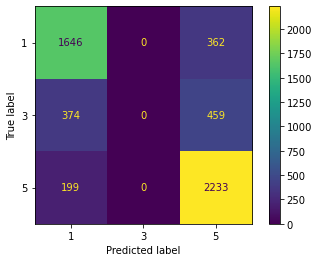

In [26]:
##         MULTINOMIAL NB

mnb= MultinomialNB()
mnb.fit(x_train,y_train)
predict= mnb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predict))
print('classification_report \n',classification_report(y_test,predict))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,predict, labels= mnb.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_)
disp.plot()                 
plt.show() 

accuracy_score 0.7401858524559074
classification_report 
               precision    recall  f1-score   support

           1       0.71      0.85      0.77      2008
           3       0.44      0.00      0.01       833
           5       0.76      0.91      0.83      2432

    accuracy                           0.74      5273
   macro avg       0.64      0.59      0.54      5273
weighted avg       0.69      0.74      0.68      5273



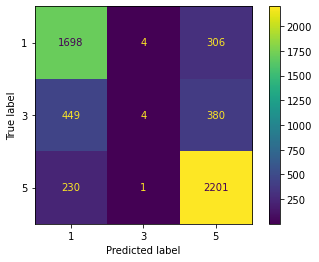

In [27]:

##                               EXTRATREES CLASSIFIER
et1= ExtraTreesClassifier(n_estimators=300,min_samples_split=4,min_samples_leaf=2,n_jobs=-1)
et1.fit(x_train,y_train)
predict= et1.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predict))
print('classification_report \n',classification_report(y_test,predict))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,predict, labels= et1.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=et1.classes_)
disp.plot()                 
plt.show() 

accuracy_score 0.745306277261521
classification_report 
               precision    recall  f1-score   support

           1       0.72      0.86      0.78      2008
           3       0.38      0.04      0.07       833
           5       0.78      0.90      0.83      2432

    accuracy                           0.75      5273
   macro avg       0.63      0.60      0.56      5273
weighted avg       0.69      0.75      0.69      5273



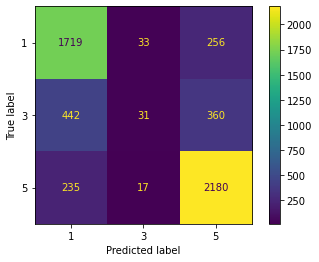

In [28]:

#                         RANDOMFOREST CLASSIFIER 
rf= RandomForestClassifier(n_jobs=-1,oob_score=True,n_estimators=300)
rf.fit(x_train,y_train)
pred= rf.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print('classification_report \n',classification_report(y_test,pred))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,pred, labels= rf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

In [ ]:
# CROSS VALIDATION

In [45]:
from sklearn.model_selection import cross_val_score, KFold
kfold= KFold(n_splits=10, shuffle=True, random_state=9)


In [ ]:
##                            ## lET'S USE CROSS-VALIDATION WITH RANDOMFOREST CLASSIFIER  ALGORITHM
RF= RandomForestClassifier()            # 
print('cross_validation score of RandomForestClassifier')
cross_val_score(RF ,x_train,y_train,cv=kfold, n_jobs=-1 ).mean()

cross_validation score of RandomForestClassifier


In [ ]:

              ## lET'S USE CROSS-VALIDATION WITH EXTRATREES CLASSIFIER  ALGORITHM
ET= ExtraTreesClassifier()
print('cross_validation score of ExtraTreesClassifier')
print(cross_val_score(ET ,x_train,y_train, cv= kfold, n_jobs=-1).mean())         



# 3
 multiclass target value (5,4,3,2,1-star) convert into (5, 1-star) for checking that whether accuracy improve or not

In [35]:
##  VECTORIZATION THE TEXT DATA WITH TF-IDF


y2 = data['rating'].replace({4:5,2:1,3:1})

x_train,x_test, y_train,y_test= train_test_split(data['review'],y2, test_size=0.20, random_state=9, )

##  VECTORIZATION THE TEXT DATA WITH TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfid= TfidfVectorizer(ngram_range =(1,2))
tfid_fit = tfid.fit(x_train)
x_train= tfid_fit.transform(x_train)
x_test= tfid_fit.transform(x_test)

accuracy_score 0.8420254124786649
classification_report 
               precision    recall  f1-score   support

           1       0.81      0.92      0.86      2841
           5       0.89      0.75      0.81      2432

    accuracy                           0.84      5273
   macro avg       0.85      0.84      0.84      5273
weighted avg       0.85      0.84      0.84      5273



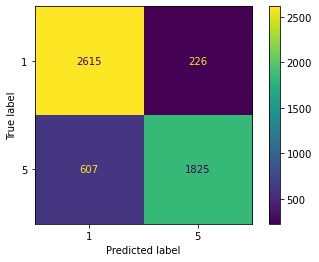

In [36]:

##  MULTINOMIAL NB 

mnb= MultinomialNB()
mnb.fit(x_train,y_train)
predict= mnb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predict))
print('classification_report \n',classification_report(y_test,predict))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,predict, labels= mnb.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_)
disp.plot()                 
plt.show() 

accuracy_score 0.8520766167267211
classification_report 
               precision    recall  f1-score   support

           1       0.85      0.88      0.87      2841
           5       0.86      0.82      0.84      2432

    accuracy                           0.85      5273
   macro avg       0.85      0.85      0.85      5273
weighted avg       0.85      0.85      0.85      5273



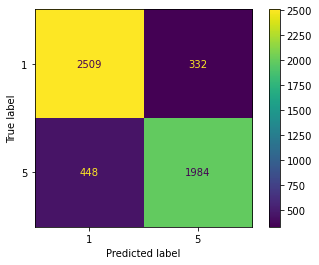

In [37]:
# RANDOM FOREST 
rf= RandomForestClassifier(n_jobs=-1,oob_score=True,n_estimators=300)
rf.fit(x_train,y_train)
pred= rf.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print('classification_report \n',classification_report(y_test,pred))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,pred, labels= rf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

accuracy_score 0.8469561919211075
classification_report 
               precision    recall  f1-score   support

           1       0.83      0.90      0.86      2841
           5       0.87      0.79      0.83      2432

    accuracy                           0.85      5273
   macro avg       0.85      0.84      0.84      5273
weighted avg       0.85      0.85      0.85      5273



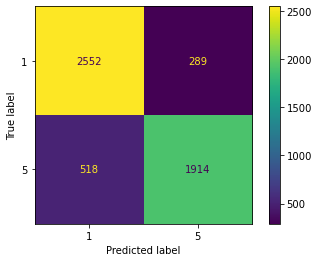

In [38]:

##                               EXTRATREES CLASSIFIER
et1= ExtraTreesClassifier(n_estimators=300,min_samples_split=4,min_samples_leaf=2,n_jobs=-1)
et1.fit(x_train,y_train)
predict= et1.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predict))
print('classification_report \n',classification_report(y_test,predict))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,predict, labels= et1.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=et1.classes_)
disp.plot()                 
plt.show() 

In [ ]:
. The target colum in this project is a multiclass and when I made the model on it, the accuracy was around 70% then i chhanged
the values of the target to 3 types, then some accuracy increased. After that I changed the target to binary class as 
the positive and negative rating, Then accuracy came at 84 percent


On this data it is difficult to predict multiclass target with good accuracy beacause some customer reviews in this data are 
almost sane but their ratings are different, That is why after converting this multiclass Target attribute to binary class,
the accuracy is getting better